In [3]:
#importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math


In [4]:
# read the data and store data in data frame
data = pd.read_csv("../input/diamonds/diamonds.csv")
# delete a column of data
data= data.drop(["Unnamed: 0"],axis=1)
# print a summary of data
print(data.head())
print("\n\n",data.describe())
print("\n\n")
# function to know type of each data
def simple_control(data):
    print(data.dtypes)
simple_control(data)  

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000

Text(0.5, 0, 'carat')

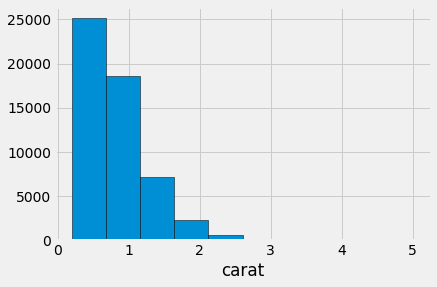

In [5]:
# Draw histogram of features

plt.style.use('fivethirtyeight')
carats = data['carat']
plt.hist(carats,bins = 10, edgecolor = 'black')
plt.xlabel('carat')

Text(0.5, 0, 'depth')

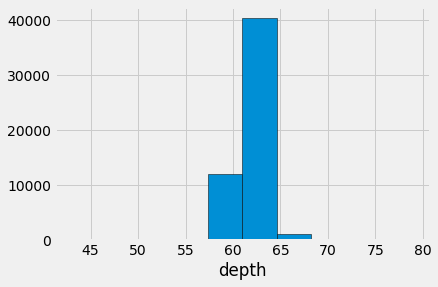

In [6]:
# Draw histogram of features

plt.style.use('fivethirtyeight')
dep = data['depth']
plt.hist(dep,bins = 10, edgecolor = 'black')
plt.xlabel('depth')

Text(0.5, 0, 'price')

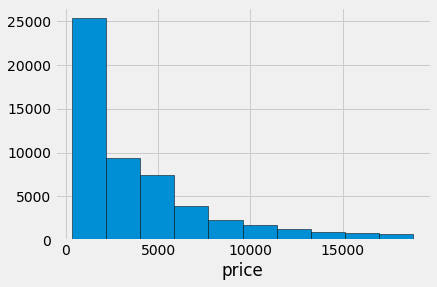

In [7]:
# Draw histogram of features

plt.style.use('fivethirtyeight')
pri = data['price']
plt.hist(pri,bins = 10, edgecolor = 'black')
plt.xlabel('price')

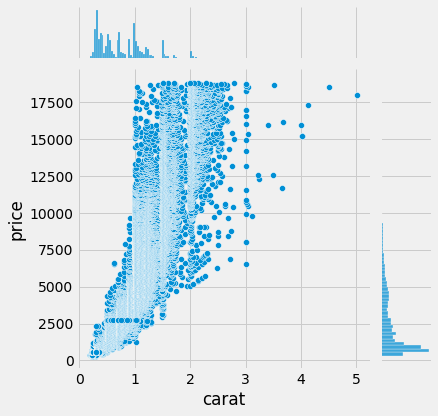

In [8]:
#the relationship between the feature carat and the target price 

sns.jointplot(x='carat', y='price', data = data)

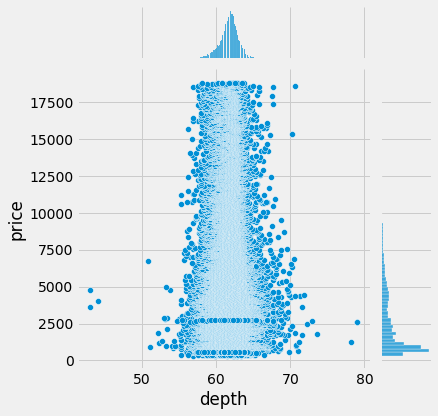

In [9]:
#the relationship between the feature depth and the target price

sns.jointplot(x='depth', y='price', data = data)

In [10]:
# choosing features

data = data[["carat","price","depth"]]
data.shape

(53940, 3)

In [11]:
# split the data into 2 sets >> Trainig set and Testing set

train, test = train_test_split(data, test_size=0.3, random_state=2)
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 37758
No. of testing examples: 16182


In [12]:
# Linear Regression model

linRegr = linear_model.LinearRegression()
trainX = np.array(train[["carat"]])
trainY = np.array(train[["price"]]) 

testX = np.array(test[['carat']])
testY = np.array(test[['price']])

linRegr.fit(trainX,trainY)
print("coefficients : ",linRegr.coef_)
print("Intercept : ",linRegr.intercept_)

coefficients :  [[7772.4409752]]
Intercept :  [-2264.62158596]


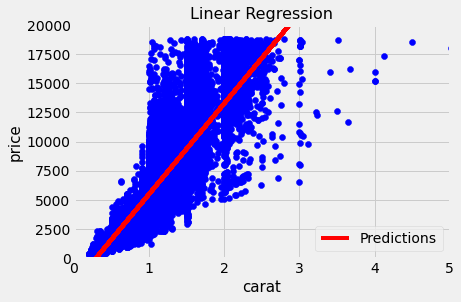

In [13]:
# plot the model

plt.scatter(data["carat"] , data["price"] , color="blue") 
plt.plot(trainX, linRegr.coef_*trainX + linRegr.intercept_, '-r',label="Predictions") 
plt.title('Linear Regression',fontsize=16)
plt.xlabel("carat",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.axis([0, 5, 0, 20000])
plt.legend()
plt.show()

In [14]:
#Error for Linear Regression (price, carat)

trainYLinPred = linRegr.predict(trainX)
print("* Training error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(trainY,trainYLinPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(trainY, trainYLinPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(trainY,trainYLinPred))

testYLinPred = linRegr.predict(testX)
print("\n* Testing error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(testY,testYLinPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(testY, testYLinPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(testY,testYLinPred))

* Training error per carat and price *
Mean absolute error: 1009.08
root mean square error 1547.87
Mean sum of squares (MSE): 2395915.10

* Testing error per carat and price *
Mean absolute error: 1009.12
root mean square error 1550.15
Mean sum of squares (MSE): 2402975.07


In [15]:
#improvement adding second feature which is depth feature with carat and price 

linRegr2 = linear_model.LinearRegression()
trainXLin2 = np.array(train[["carat","depth"]])
trainYLin2 = np.array(train[["price"]])

linRegr2.fit(trainXLin2,trainYLin2)

print("coefficients : ",linRegr2.coef_)
print("Intercept : ",linRegr2.intercept_)

coefficients :  [[7777.38260187  -94.21405985]]
Intercept :  [3548.90452961]


In [16]:
#Error for Linear Regression (price, carat, depth)

trainYLinPred2 = linRegr2.predict(trainXLin2)
print("* training error (carat,depth) and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(trainYLin2,trainYLinPred2))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(trainYLin2, trainYLinPred2)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(trainYLin2,trainYLinPred2))

testXLin2 = np.array(test[["carat","depth"]])
testYLin2 = np.array(test[['price']])
testYLinPred2 = linRegr2.predict(testXLin2)
print("\n* testing error (carat,depth) and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(testYLin2,testYLinPred2))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(testYLin2, testYLinPred2)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(testYLin2,testYLinPred2))

* training error (carat,depth) and price *
Mean absolute error: 1006.40
root mean square error 1541.96
Mean sum of squares (MSE): 2377654.69

* testing error (carat,depth) and price *
Mean absolute error: 1005.56
root mean square error 1540.97
Mean sum of squares (MSE): 2374592.03


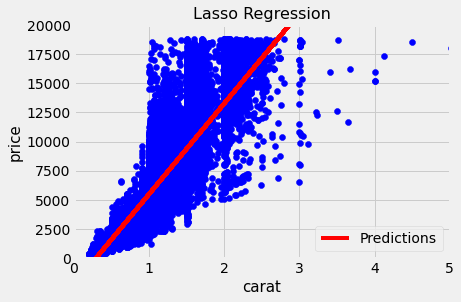

In [17]:
# Lasso Regression model

lasso_reg = Lasso(alpha =0.1)
lasso_reg.fit(trainX, trainY)

# plot the model

plt.scatter(data["carat"] , data["price"] , color="blue") 
plt.plot(trainX, lasso_reg.coef_*trainX + lasso_reg.intercept_, '-r',label="Predictions")
plt.title('Lasso Regression',fontsize=16)
plt.xlabel("carat",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.axis([0, 5, 0, 20000])
plt.legend()
plt.show()

In [18]:
#Error for Lasso Regression (price, carat)

trainYLasPred = lasso_reg.predict(trainX)
print("* Training error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(trainY,trainYLasPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(trainY, trainYLasPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(trainY,trainYLasPred))

testYLasPred = lasso_reg.predict(testX)
print("\n* Testing error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(testY,testYLasPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(testY, testYLasPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(testY,testYLasPred))

* Training error per carat and price *
Mean absolute error: 1009.04
root mean square error 1547.87
Mean sum of squares (MSE): 2395915.15

* Testing error per carat and price *
Mean absolute error: 1009.08
root mean square error 1550.15
Mean sum of squares (MSE): 2402964.45


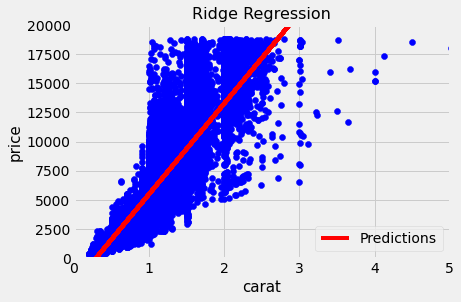

In [19]:
# Ridge Regression model
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(trainX, trainY)

# plot the model

plt.scatter(data["carat"] , data["price"] , color="blue") 
plt.plot(trainX, ridge_reg.coef_*trainX + ridge_reg.intercept_, '-r',label="Predictions") 
plt.title('Ridge Regression',fontsize=16)
plt.xlabel("carat",fontsize=15)
plt.ylabel("price",fontsize=15)
plt.axis([0, 5, 0, 20000])
plt.legend()
plt.show()

In [20]:
#Error for Ridge Regression (price, carat)

trainYRidPred = ridge_reg.predict(trainX)
print("* Training error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(trainY,trainYRidPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(trainY, trainYRidPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(trainY,trainYRidPred))

testYRidPred = ridge_reg.predict(testX)
print("\n* Testing error per carat and price *")
print("Mean absolute error: %.2f" % mean_absolute_error(testY,testYRidPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(testY, testYRidPred)))
print("Mean sum of squares (MSE): %.2f" % mean_squared_error(testY,testYRidPred))

* Training error per carat and price *
Mean absolute error: 1008.99
root mean square error 1547.87
Mean sum of squares (MSE): 2395915.29

* Testing error per carat and price *
Mean absolute error: 1009.03
root mean square error 1550.15
Mean sum of squares (MSE): 2402953.31


In [21]:
# polynomial Regression model
def polyR(n):
    print("degree of polynomial is ",n,'\n')
    X = data[["carat"]]
    y = data[["price"]]
    poly = PolynomialFeatures(degree = n)
    X_poly = poly.fit_transform(X)
  
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly, y)
    
    X_new=np.linspace(0, 5, 53940).reshape(53940 , 1)
    X_new_poly = poly.fit_transform(X_new)
    
    
    plt.scatter(X, y, color = 'blue')
  
    # plot the model 

    plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red',label="Predictions")
    plt.title('Polynomial Regression',fontsize=16)
    plt.xlabel('Carat',fontsize=15)
    plt.ylabel('Price',fontsize=15)
    plt.axis([0, 5, 0, 20000])
    plt.legend()
    plt.show()
    
    #Error for Polynomial Regression 
    
    trainYPolyPred = lin2.predict(X_poly)
    print("* Training error per carat and price *")
    print("Mean absolute error: %.2f" % mean_absolute_error(y,trainYPolyPred))
    print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, trainYPolyPred)))
    print("Mean sum of squares (MSE): %.2f" % mean_squared_error(y,trainYPolyPred))

    testYPolyPred = lin2.predict(X_new_poly)
    #testYPolyPred = lin2.predict(X_poly)
    print("\n* Testing error per carat and price *")
    print("Mean absolute error: %.2f" % mean_absolute_error(y,testYPolyPred))
    print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, testYPolyPred)))
    print("Mean sum of squares (MSE): %.2f\n" % mean_squared_error(y,testYPolyPred))

degree of polynomial is  1 



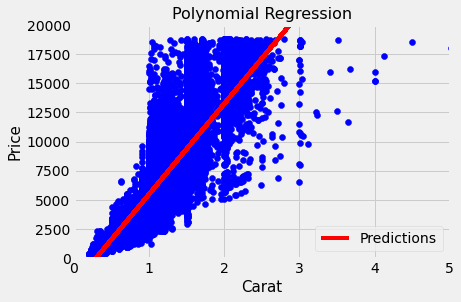

* Training error per carat and price *
Mean absolute error: 1007.46
root mean square error 1548.53
Mean sum of squares (MSE): 2397955.05

* Testing error per carat and price *
Mean absolute error: 14027.70
root mean square error 18519.19
Mean sum of squares (MSE): 342960357.72



degree of polynomial is  2 



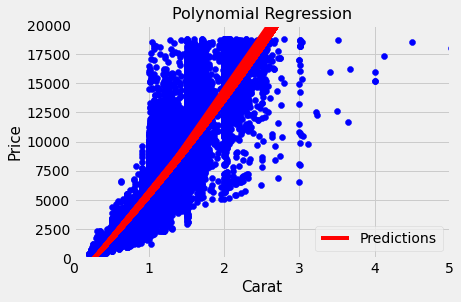

* Training error per carat and price *
Mean absolute error: 953.89
root mean square error 1540.06
Mean sum of squares (MSE): 2371783.91

* Testing error per carat and price *
Mean absolute error: 15945.37
root mean square error 21414.72
Mean sum of squares (MSE): 458590203.75



degree of polynomial is  3 



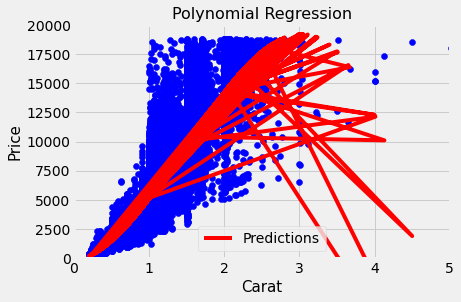

* Training error per carat and price *
Mean absolute error: 842.78
root mean square error 1465.55
Mean sum of squares (MSE): 2147833.48

* Testing error per carat and price *
Mean absolute error: 7746.14
root mean square error 10142.91
Mean sum of squares (MSE): 102878695.86



In [22]:
polyR(1)
print("\n")
polyR(2)
print("\n")
polyR(3)